# Welcome to homework 3 by WIlly G
Let's do some imports.

In [435]:
%matplotlib inline

import scipy.io
from sklearn import svm
from sklearn.preprocessing import normalize
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pylab as plt

Time to get some awesome data for MNIST and do some dundiddly preprocessing.

2


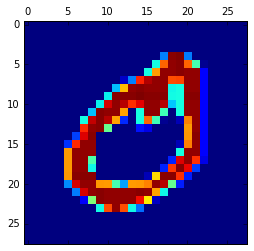

In [436]:
image_train = scipy.io.loadmat("../data/digit_dataset/train.mat")
image_test = scipy.io.loadmat("../data/digit_dataset/test.mat")

image_train_data_raw =  image_train['train_images']
image_train_label_raw =  image_train['train_labels']
image_tdata = np.array([np.array(image_train_data_raw[:,:,i].flatten()) for i in range(len(image_train_data_raw[0,0]))])
image_tlabel = image_train_label_raw.ravel()
tdivide = 1/255.0*2
image_tdata = image_tdata * tdivide
image_tdata -=  1

#Shuffle that image data good.
shuffle = np.random.permutation(np.arange(image_tdata.shape[0]))
image_tdata, image_tlabel = image_tdata[shuffle], image_tlabel[shuffle]

#VALIDATION
image_valid_data  =  image_tdata[0:10000]
image_valid_label = image_tlabel[0:10000]

#TRAINING
image_train_data  =image_tdata[10000:]
image_train_label =image_tlabel[10000:]

plt.matshow(image_train_data_raw[:,:,1])
print(image_train_label[0]) #unrelated to the plot!

Did you like that. I did. Okay so, let's make a class which model data classes!

In [437]:
def perturb_eig(mat, alpha):
    return mat + alpha*np.eye(mat.shape[0])



class dataclass:
    def __init__(self, datum, labels, class_label, alpha):
        # Find all of the datapoints in datum with the labels class_lab.
        # add them to this dataclass
        ids_classc = [idx for idx,label in enumerate(labels) if label == class_label ]
        self.data = datum[ids_classc]
        
        #calculate some things!
        singcov = np.cov(self.data.T)
        self.mean = np.mean(self.data, axis = 0)
        self.prior = len(ids_classc)/len(labels)
        
        #Let's make sure we can invert the covariance matrix using a bincary searach.
        self.cov = perturb_eig(singcov, 0.0000001)
        
        #make sure to get the inverted precision matrix        
        self.prec = np.linalg.inv(self.cov)
        
        sign, precd = np.linalg.slogdet(self.prec)
        print(precd)
        self.precdet = precd
        
    def lda(self, precall, x):
        wx = np.dot(self.mean,np.dot(precall, x))
        alpha = 0.5* np.dot(self.mean, np.dot(precall, self.mean)) + np.log(self.prior)
        return wx + alpha
    
    def qda(self, x):
        dist = x - self.mean
        quad = np.dot(dist, np.dot(self.prec, dist))
        return quad -0.5*self.precdet + np.log(self.prior)

We gotta make sure this class makes sense

5422.59271338
[[  1.00000000e-07   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   1.00000000e-07   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   1.00000000e-07 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 ..., 
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   1.00000000e-07
    0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    1.00000000e-07   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   1.00000000e-07]]


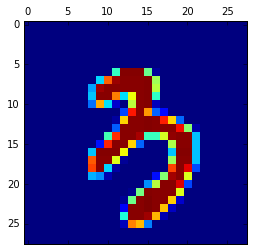

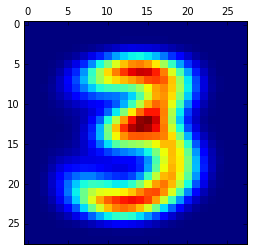

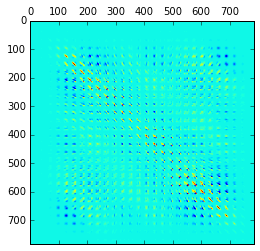

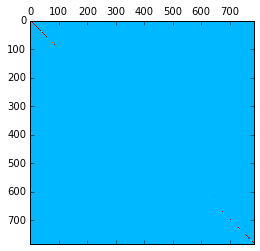

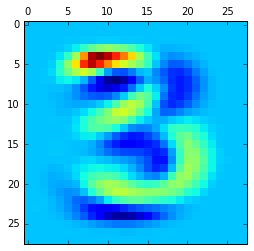

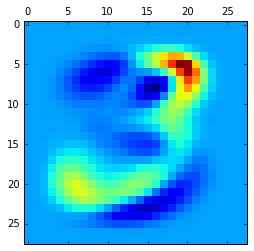

In [438]:
a = dataclass(image_train_data, image_train_label, 3.0,1)

plt.matshow(a.data[10].reshape((28,28)))
plt.matshow(a.mean.reshape((28,28)))
plt.matshow(a.cov)
plt.matshow(a.prec)
plt.matshow(a.cov[120].reshape((28,28)))
plt.matshow(a.cov[160].reshape((28,28)))

print(a.cov)


Let's actually make all of the image classes!

In [439]:
image_train_class = [dataclass(image_train_data, image_train_label, float(x), 0.1) for x in range(10)]

5777.38454096
7042.13227418
5106.29446051
5422.59271338
5438.20874953
5389.16345672
5868.77687303
5782.50148513
5735.91333298
6170.16336548


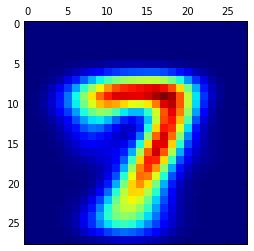

In [440]:
plt.matshow(image_train_class[7].mean.reshape((28,28)))

Well that worked thank god!
Now we need to add all of those peski general properties

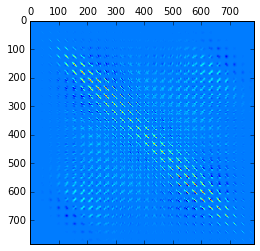

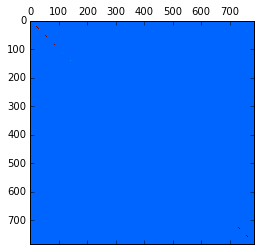

In [441]:
covall = 0.1*np.sum([image_train_class[i].cov for i in range(len(image_train_class))], axis=0)
precall = np.linalg.inv(covall)
plt.matshow(covall)
plt.matshow(precall)

# Question 5 part(d)i

In [446]:
np.argmax([image_train_class[i].qda(image_train_class[8].data[10]) for i in range(10)])

1

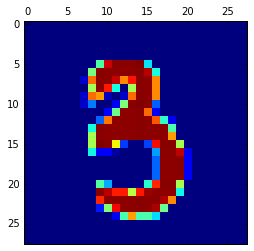

In [443]:
plt.matshow(image_train_class[3].data[2].reshape((28,28)))